In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("SmallerQVCdata.xlsx")
data2 = pd.read_csv("2010_Census_Populations_by_Zip_Code.csv")
data.head()

,#Sales_Order_Nbr,Sales_Order_Line_Nbr,Package_Id,Order_Dt,Party_Id,Order_Type_Cd,Shipping_Priority_Ind,Total_Line_Amt,Unit_Price_Amt,Line_Status_Cd,...,Pickup_Dt,Scheduled_Delivery_Dt,Rescheduled_Delivery_Dt,Package_Scan_Dttm,Package_Cnt,Actual_Total_Package_Qty,Delivery_Confirmation_Dt,SHIP_TO_CITY,SHIP_TO_STATE,SHIP_TO_ZIP
0,650057291936,1,2909894305,2016-09-30,1096789,QVC,NaN,37.98,35.00,VS,...,NaN,NaN,NaN,2016-10-02 08:28:56,1,1,2016-10-04,NaN,NJ,8844
1,649303089426,1,2924001292,2016-11-08,12488699,QVC,NaN,33.82,28.68,VS,...,NaN,NaN,NaN,2016-11-09 15:15:05,1,1,2016-11-15,NaN,OH,44319
2,650115704916,1,2921368568,2016-10-18,47421699,QVC,NaN,53.78,47.50,RT,...,NaN,NaN,NaN,2016-11-03 03:11:28,1,1,2016-11-05,NaN,OH,44657
3,649147306436,1,2909501335,2016-09-19,626910699,QVC,NaN,73.17,66.20,RT,...,NaN,NaN,NaN,2016-09-30 16:13:48,1,1,2016-10-07,NaN,IA,51046
4,849309172438,2,2924707056,2016-11-11,53373699,QVC,NaN,45.49,39.94,VS,...,2016-11-14 00:00:00,NaN,2016-11-17 00:00:00,2016-11-13 20:27:19,1,2,2016-11-17,NaN,MO,63304


In [3]:
data2.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [4]:
unq_zip = np.unique(data2.iloc[:,0])
data2.iloc[0:1,0]

0    91371
Name: Zip Code, dtype: int64

In [ ]:
new_d = []
#.iloc[0:1,0] d1.iloc[d1['SHIP_TO_ZIP'] == d2['Zip Code']
for d2_i, d2_r in data2.iterrows():
    #print(d2)
    temp = []
    for d1_i,d1_r in data.iterrows():
        
        if d1_r['SHIP_TO_ZIP'] == d2_r['Zip Code']:
            temp.append(d1_r)
    #temp = [d1 if d1[35] == d2[0] for d1 in data]
    
    for t_r in temp:
        t_r['Total_Population'] = d2_r['Total Population']
        t_r['Median Age'] = d2_r['Median Age']
        t_r['Total Males'] = d2_r['Total Males']
        t_r['Total Females'] = d2_r['Total Females']
        t_r['Total Households'] = d2_r['Total Households']
        t_r['Average Household Size'] = d2_r['Average Household Size']
        
    new_d.append(temp)

319

In [7]:
data.columns

Index([u'#Sales_Order_Nbr', u'Sales_Order_Line_Nbr', u'Package_Id',
       u'Order_Dt', u'Party_Id', u'Order_Type_Cd', u'Shipping_Priority_Ind',
       u'Total_Line_Amt', u'Unit_Price_Amt', u'Line_Status_Cd',
       u'Line_Status_Dt', u'Product_Id', u'Skn_Id', u'Sku_Id', u'Color_Desc',
       u'Size_Desc', u'Shipped_Dt', u'Source_Ship_Warehouse_Nbr',
       u'Assigned_Dc_Id', u'Cancelled_Qty', u'Ordered_Qty', u'Shipped_Qty',
       u'Merchandise_Div_Desc', u'Merchandise_Dept_Desc',
       u'Carrier_Used_Tracking_Id', u'Shipment_Status_Dt', u'Pickup_Dt',
       u'Scheduled_Delivery_Dt', u'Rescheduled_Delivery_Dt',
       u'Package_Scan_Dttm', u'Package_Cnt', u'Actual_Total_Package_Qty',
       u'Delivery_Confirmation_Dt', u'SHIP_TO_CITY', u'SHIP_TO_STATE',
       u'SHIP_TO_ZIP'],
      dtype='object')

In [5]:
#np.unique(data['SHIP_TO_STATE'])
data['diff'] = (data['Delivery_Confirmation_Dt'] - data['Order_Dt']).dt.days
data['init_diff'] = (data['Shipped_Dt'] - data['Order_Dt']).dt.days
data['ship_diff'] = (data['Delivery_Confirmation_Dt'] - data['Shipped_Dt']).dt.days

In [6]:
unq_customers_ids = np.unique(data['Party_Id'])
unq_customers = [ data.loc[data['Party_Id'] == u] for u in unq_customers_ids]

In [7]:
unq_customers[2]

,#Sales_Order_Nbr,Sales_Order_Line_Nbr,Package_Id,Order_Dt,Party_Id,Order_Type_Cd,Shipping_Priority_Ind,Total_Line_Amt,Unit_Price_Amt,Line_Status_Cd,...,Package_Scan_Dttm,Package_Cnt,Actual_Total_Package_Qty,Delivery_Confirmation_Dt,SHIP_TO_CITY,SHIP_TO_STATE,SHIP_TO_ZIP,diff,init_diff,ship_diff
48301,749382118737,1,2932447886,2016-11-29,114789,QVC,NaN,31.42,26.36,VS,...,2016-12-01 08:43:14,1,1,2016-12-06,NaN,NJ,8638,7.0,3.0,4.0
53552,249382118742,1,2932463346,2016-11-29,114789,QVC,NaN,35.31,30.00,VS,...,2016-11-30 19:03:59,1,1,2016-12-04,NaN,NJ,8638,5.0,2.0,3.0
61836,949382118719,1,2932463339,2016-11-29,114789,QVC,NaN,31.42,26.36,VS,...,2016-12-01 10:42:47,1,1,2016-12-09,NaN,NJ,8638,10.0,3.0,7.0
77528,49382118720,1,2932447885,2016-11-29,114789,QVC,NaN,31.42,26.36,VS,...,2016-12-01 00:37:32,1,1,2016-12-06,NaN,NJ,8638,7.0,2.0,5.0


In [8]:
unq_customers[2]['Party_Id']

48301    114789
53552    114789
61836    114789
77528    114789
Name: Party_Id, dtype: int64

In [9]:
rdf = [ [
         np.max(unc['Party_Id']), 
         np.mean(unc['Total_Line_Amt']), 
         np.median(unc['Total_Line_Amt']),
         np.sum(unc['Total_Line_Amt']),
         np.mean(unc['diff']), 
         np.median(unc['diff']),
        np.mean(unc['ship_diff']), 
         np.median(unc['ship_diff']),
        np.mean(unc['init_diff']), 
         np.median(unc['init_diff']),
         len(unc)
        ]
         for unc in unq_customers
      ]



C:\Users\Siddharth Patel\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [10]:
rdf[1]

[103789,
 50.48666666666667,
 30.98,
 151.46,
 8.666666666666666,
 7.0,
 7.333333333333333,
 6.0,
 1.3333333333333333,
 1.0,
 3]

In [11]:
df2 = pd.DataFrame(rdf,
               columns=['Party_Id', 'Mean_Business', 'Median_Business','Total_Business' ,'Mean_Days', 'Median_Days', 'Mean_Ship_Delay', 'Median_Ship_Delay','Mean_Initial_Delay', 'Median_Initial_Delay', 'Total_Transactions'])

In [12]:
df2.head()

,Party_Id,Mean_Business,Median_Business,Total_Business,Mean_Days,Median_Days,Mean_Ship_Delay,Median_Ship_Delay,Mean_Initial_Delay,Median_Initial_Delay,Total_Transactions
0,101789,84.780000,84.78,84.78,6.000000,6.0,4.000000,4.0,2.000000,2.0,1
1,103789,50.486667,30.98,151.46,8.666667,7.0,7.333333,6.0,1.333333,1.0,3
2,114789,32.392500,31.42,129.57,7.250000,7.0,4.750000,4.5,2.500000,2.5,4
3,121699,60.234286,59.46,421.64,6.857143,6.0,4.428571,4.0,2.428571,2.0,7
4,128789,209.880000,209.88,209.88,6.000000,6.0,5.000000,5.0,1.000000,1.0,1


In [13]:
df2.to_csv('transactionsq3.csv', sep=',', encoding='utf-8')

In [14]:
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
#import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

C:\Users\Siddharth Patel\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
df_features = ['Mean_Business', 'Median_Business','Total_Business' ,'Mean_Days', 'Median_Days', 'Mean_Initial_Delay', 'Median_Initial_Delay']
df_target =  'Total_Transactions'

df_features_aic = ['Mean_Business', 'Median_Business','Total_Business' ,'Mean_Days', 'Median_Days']

df_features_2 = ['Total_Business' ,'Mean_Days', 'Mean_Initial_Delay','Mean_Ship_Delay']

In [16]:
df2.dropna(inplace=True)

#x = np.array(df2.drop(['Total_Transactions'],1))
x = np.array(df2[df_features])
x2 = np.array(df2[df_features_aic])
x3 = np.array(df2[df_features_2])
y = np.array(df2['Total_Transactions'])

In [17]:
print(len(x2),len(y))
x

(9336, 9336)


array([[  84.78      ,   84.78      ,   84.78      , ...,    6.        ,
           2.        ,    2.        ],
       [  50.48666667,   30.98      ,  151.46      , ...,    7.        ,
           1.33333333,    1.        ],
       [  32.3925    ,   31.42      ,  129.57      , ...,    7.        ,
           2.5       ,    2.5       ],
       ..., 
       [ 133.27      ,  133.27      ,  133.27      , ...,    5.        ,
           3.        ,    3.        ],
       [  31.82666667,   28.14      ,  190.96      , ...,    6.        ,
           3.        ,    3.        ],
       [ 181.4       ,  181.4       ,  181.4       , ...,    5.        ,
           3.        ,    3.        ]])

In [18]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.2)

x_train2,x_test2,y_train,y_test = cross_validation.train_test_split(x2,y,test_size=0.2)



In [19]:
print(x_test.shape,y_test.shape)
print( x_test2.shape,y_test.shape)

((1868L, 7L), (1868L,))
((1868L, 5L), (1868L,))


In [20]:
clf = LinearRegression()
clf.fit(x_train,y_train)

clf_aic = LinearRegression()
clf_aic.fit(x_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
accuracy = clf.score(x_test,y_test)
accuracy_aic = clf_aic.score(x_test2,y_test)
print(accuracy)
print(accuracy_aic)

-0.00127469810574
0.887925317225


In [22]:
pred = clf.predict(x_test)
pred2 = clf_aic.predict(x_test2)

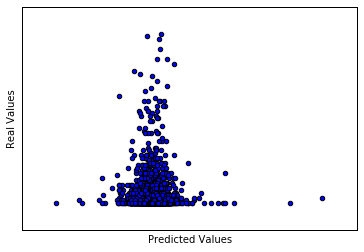

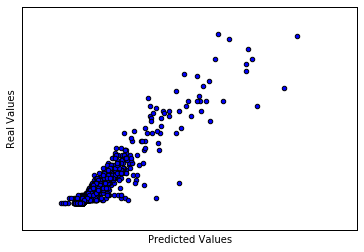

In [23]:
plt.scatter(pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.xticks(())
plt.yticks(())
plt.show()


plt.scatter(pred2, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

('Coefficients: \n', array([ -3.83429891e-03,   3.46690522e-03,  -1.41754040e-04,
         3.23956564e-01,  -2.40230039e-01,  -3.36782753e-01,
         2.67603005e-01]))
Mean squared error: 57.16
Variance score: -0.00


In [25]:
print('Coefficients: \n', clf_aic.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred2))

('Coefficients: \n', array([-0.07420108,  0.05440758,  0.01503867,  0.02664827, -0.03227541]))
Mean squared error: 6.40
Variance score: 0.89


In [26]:
x_train3,x_test3,y_train,y_test = cross_validation.train_test_split(x3,y,test_size=0.2)
clf3 = LinearRegression()
clf3.fit(x_train3,y_train)
clf3.score(x_test3,y_test)

0.77211874903911049

In [27]:
pred3 = clf3.predict(x_test3)

In [28]:
print('Coefficients: ', clf3.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred3))

('Coefficients: ', array([ 0.01265403,  0.01830567, -0.00446198,  0.02276764]))
Mean squared error: 13.49
Variance score: 0.77


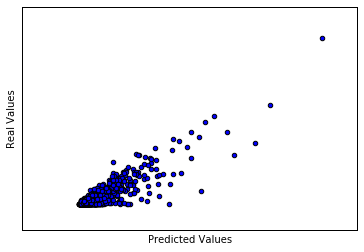

In [29]:
plt.scatter(pred3, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.xticks(())
plt.yticks(())
plt.show()

In [30]:
import statsmodels.api as sm

In [31]:
clf3.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'